In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import *

In [2]:
m, b = 4.66402766, 2.22976949
m_err, b_err = 0.00618106, 1.384337

## 2 Lead N Graphite

In [3]:
regions = [
    ('No Graphite', './data/pu-unplugged-lead2-1.csv'), 
    ('15 Graphite Blocks', './data/pu-unplugged-lead2graphite15.csv'), 
]

/var/folders/lz/3l45kw_56ln6k0x68wfrb0th0000gn/T/ipykernel_48037/2398856785.py:9: RuntimeWarning: divide by zero encountered in log
  ax.scatter(m * channels + b, np.log(rate), color='k', s=2, alpha=0.25)


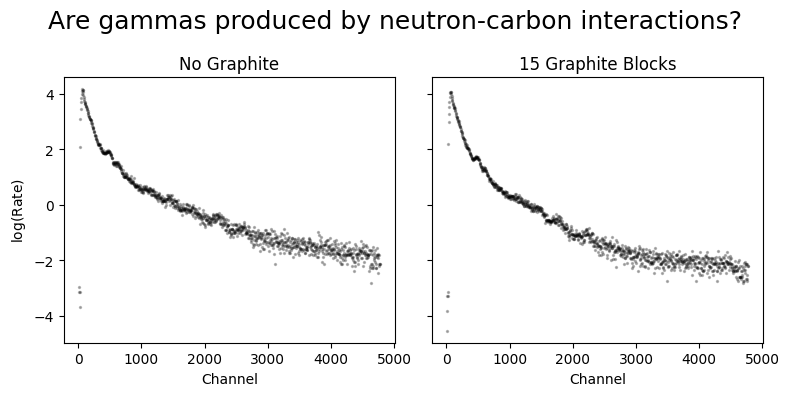

In [4]:
fig, axs = plt.subplots(1, len(regions), figsize=(4 * len(regions), 4), sharey=True)

for ax, (title, fname) in zip(axs, regions):
    
    time, channels, counts = parse_usx_csv(fname)
    rate = counts / time
    rate_err = np.sqrt((counts / time**2) + (counts**2 * 0.1**2 / time**4))
    
    ax.scatter(m * channels + b, np.log(rate), color='k', s=2, alpha=0.25)
    ax.set_title(title)
    ax.set_xlabel('Channel')

axs[0].set_ylabel(r'$\log (\text{Rate})$')
fig.suptitle('Are gammas produced by neutron-carbon interactions?', fontsize=18)
plt.tight_layout()

fig.savefig('./figures/graphite_accentuation.pdf')